<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/Matriz_de_Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matriz de Correlação**

In [ ]:
!pip install yfinance

In [ ]:
!pip install investpy

In [20]:
import yfinance as yf
import pandas as pd
import investpy

Extração dos dados

In [5]:
ativos = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 
          'BPAC11.SA','OIBR3.SA', 'KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 
          'HGLG11.SA','HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [6]:
data = yf.download(ativos, start="2019-01-01", end="2022-05-15")['Adj Close']

[*********************100%***********************]  15 of 15 completed


In [7]:
data.head()

,AAPL34.SA,BPAC11.SA,HCTR11.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,ONEF11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2019-01-02,14.617930,5.773697,NaN,234.296234,139.018631,74.25,146.885452,37.106571,5.641578,1.26,148.133942,15.523999,89.000000,39.107300,8.611477
2019-01-03,13.018453,6.012528,NaN,234.592331,139.067978,74.25,148.476120,36.637947,5.581216,1.41,148.133942,15.904680,89.000000,37.507492,8.807847
2019-01-04,13.226552,6.225854,NaN,234.375198,138.377304,74.25,148.594681,35.232075,5.411353,1.41,147.955002,15.949844,90.500000,39.949306,8.908427
2019-01-07,13.199934,6.353385,NaN,235.381866,139.610626,74.25,147.675858,34.422630,5.495374,1.42,143.163010,16.201481,88.199997,39.734982,8.769531
2019-01-08,13.596780,6.235073,NaN,236.862259,140.103943,74.25,147.893204,35.530285,5.451089,1.38,139.196198,16.104700,88.830002,40.117710,8.697689


## Importando dados de índices, commodities e criptomoedas

### Índices

In [21]:
import investpy

In [22]:
# Para o IBOV

search_results = investpy.search_quotes(text = 'bvsp', products = ['indices'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

ibov = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [23]:
# Para o S&P 500

search_results = investpy.search_quotes(text = 'spx', products = ['indices'],
                      countries = ['united states'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

sp500 = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [24]:
ibov.rename(columns = {'Close': 'IBOV'}, inplace = True)

sp500.rename(columns = {'Close': 'S&P500'}, inplace = True)

indices = pd.merge(ibov, sp500, how = 'inner', on = 'Date')

indices = indices[['IBOV', 'S&P500']]

In [25]:
indices.head()

,IBOV,S&P500
Date,,
2017-01-03,61814.0,2257.83
2017-01-04,61589.0,2270.75
2017-01-05,62071.0,2269.00
2017-01-06,61665.0,2276.98
2017-01-09,61700.0,2268.90


### Commodities

In [26]:
# Café
search_results = investpy.search_quotes(text = 'coffe', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

cafe = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


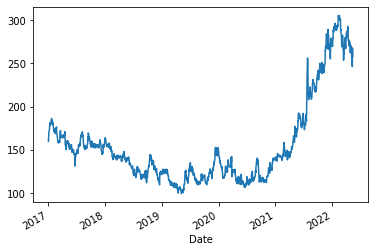

In [27]:
cafe.Close.plot()

In [28]:
cafe.rename(columns = {'Close': 'cafe'}, inplace = True)

In [29]:
# Soja
search_results = investpy.search_quotes(text = 'soy', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [30]:
soja = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

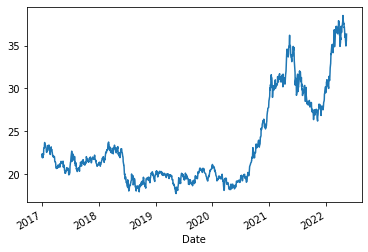

In [31]:
soja.Close.plot()

In [32]:
soja.rename(columns = {'Close': 'soja'}, inplace = True)

In [33]:
# Etanol
search_results = investpy.search_quotes(text = 'ethanol', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": null, "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [34]:
etanol = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

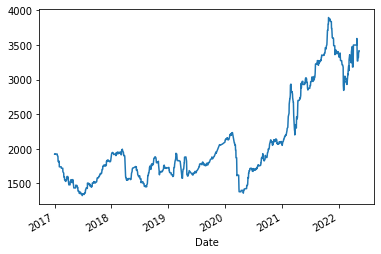

In [35]:
etanol.Close.plot()

In [36]:
etanol.rename(columns = {'Close': 'etanol'}, inplace = True)

In [37]:
interm = pd.merge(cafe, soja, how = 'inner', on = 'Date')
commodities = pd.merge(interm, etanol, how = 'inner', on = 'Date')

In [38]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [39]:
from functools import reduce

In [40]:
lista_dfs = [cafe, soja, etanol]

In [41]:
commodities = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), lista_dfs)

In [42]:
commodities = commodities[['cafe','soja','etanol']]

In [43]:
commodities.head()

,cafe,soja,etanol
Date,,,
2017-01-02,159.85,22.33,1925.0
2017-01-03,163.30,21.94,1930.0
2017-01-04,168.95,22.38,1925.0
2017-01-05,170.90,22.32,1925.0
2017-01-06,171.00,21.93,1925.0


### 6.2.3. Criptomoedas

In [44]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

In [45]:
bitcoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-01-01,963.4,1001.6,956.1,995.4,41149,USD
2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD
2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD
2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD
2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD


In [46]:
bitcoin.rename(columns = {'Close': 'bitcoin'}, inplace = True)

In [47]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

ethereum.rename(columns = {'Close': 'ethereum'}, inplace = True)

In [48]:
ethereum.head()

,Open,High,Low,ethereum,Volume,Currency
Date,,,,,,
2017-01-01,8.17,8.59,8.03,8.20,144921,USD
2017-01-02,8.19,8.50,8.11,8.37,101269,USD
2017-01-03,8.43,9.90,8.30,9.74,603421,USD
2017-01-04,9.57,11.10,9.44,11.00,556252,USD
2017-01-05,11.16,11.70,9.20,10.15,490641,USD


In [49]:
cripto = pd.merge(bitcoin, ethereum, how = 'inner', on = 'Date')

In [50]:
cripto.head()

,Open_x,High_x,Low_x,bitcoin,Volume_x,Currency_x,Open_y,High_y,Low_y,ethereum,Volume_y,Currency_y
Date,,,,,,,,,,,,
2017-01-01,963.4,1001.6,956.1,995.4,41149,USD,8.17,8.59,8.03,8.20,144921,USD
2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD,8.19,8.50,8.11,8.37,101269,USD
2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD,8.43,9.90,8.30,9.74,603421,USD
2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD,9.57,11.10,9.44,11.00,556252,USD
2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD,11.16,11.70,9.20,10.15,490641,USD


In [51]:
cripto = cripto[['bitcoin', 'ethereum']]

In [52]:
cripto.head()

,bitcoin,ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15


## 6.3. Dados do dólar

In [57]:
inicio = '2017-01-01'

In [58]:
dolar = yf.download('USDBRL=X', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [59]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3.2532,3.2797,3.2427,3.2532,3.2532,0
2017-01-03,3.2841,3.2897,3.2475,3.2840,3.2840,0
2017-01-04,3.2635,3.2643,3.2188,3.2635,3.2635,0
2017-01-05,3.2149,3.2276,3.1998,3.2141,3.2141,0
2017-01-06,3.1975,3.2118,3.1894,3.1977,3.1977,0


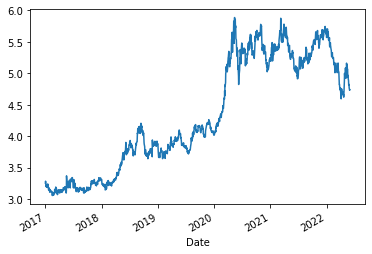

In [60]:
dolar.Close.plot()

In [61]:
dolar = pd.DataFrame(dolar.Close).rename(columns = {'Close': 'Dolar'})

In [62]:
dolar.head()

,Dolar
Date,
2017-01-02,3.2532
2017-01-03,3.2840
2017-01-04,3.2635
2017-01-05,3.2141
2017-01-06,3.1977


## 6.4. Dados de ações

In [63]:
data.head()

,AAPL34.SA,BPAC11.SA,HCTR11.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,ONEF11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2019-01-02,14.617930,5.773697,NaN,234.296234,139.018631,74.25,146.885452,37.106571,5.641578,1.26,148.133942,15.523999,89.000000,39.107300,8.611477
2019-01-03,13.018453,6.012528,NaN,234.592331,139.067978,74.25,148.476120,36.637947,5.581216,1.41,148.133942,15.904680,89.000000,37.507492,8.807847
2019-01-04,13.226552,6.225854,NaN,234.375198,138.377304,74.25,148.594681,35.232075,5.411353,1.41,147.955002,15.949844,90.500000,39.949306,8.908427
2019-01-07,13.199934,6.353385,NaN,235.381866,139.610626,74.25,147.675858,34.422630,5.495374,1.42,143.163010,16.201481,88.199997,39.734982,8.769531
2019-01-08,13.596780,6.235073,NaN,236.862259,140.103943,74.25,147.893204,35.530285,5.451089,1.38,139.196198,16.104700,88.830002,40.117710,8.697689


## Juntando tudo num dataframe só

In [65]:
# Dados de ações
data.index = pd.to_datetime(data.index)
# Dados de índices
indices.index = pd.to_datetime(indices.index)
# Dados de commodities
commodities.index = pd.to_datetime(commodities.index)
# Dados de criptomoedas
cripto.index = pd.to_datetime(cripto.index)
# Cotação do dólar
dolar.index = pd.to_datetime(dolar.index)

In [66]:
dfs = [data, indices, commodities, cripto, dolar]

In [67]:
df_final = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), dfs)

## Matriz de Correlação

In [73]:
import seaborn as sns

In [74]:
import matplotlib.pyplot as plt

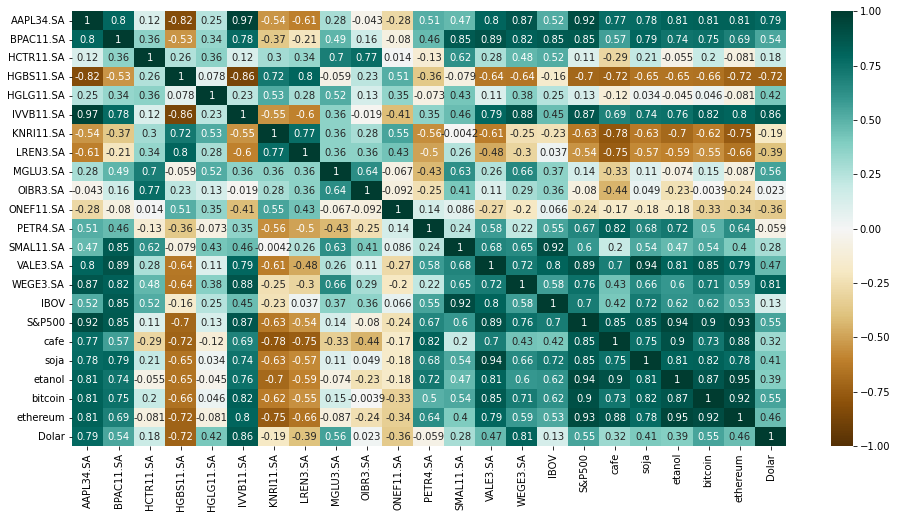

In [75]:
plt.figure(figsize = (16,8))

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')